# Chapter 08 이미지를 위한 인공 신경망
- 이미지 분류 문제에 뛰어난 성능을 발휘하는 합성곱 신경망의 개념과 구성요소에 대해 배움
- 케라스 API로 합성곱 신경망을 만들어 패션 MNIST 데이터에서 성능을 평가해 봄
- 합성곱 층의 필터와 활성화 출력을 시각화하여 합송곱 신경망이 학습한 내용을 고찰

## 8-3 합성곱 신경망의 시각화
- 합성곱 층의 가중치와 특성 맵을 시각화하여 신경망이 이미지에서 어떤 것을 학습하는지 이해

### 가중치 시각화

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input,train_target),(test_input,test_target)=keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
train_scaled=train_input.reshape(-1,28,28,1)/255.0

In [4]:
train_scaled,val_scaled,train_target,val_target=train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)

In [6]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [8]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))

In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-cnn-model.h5',save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history=model.fit(train_scaled,train_target,epochs=20,validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 18s 4ms/step - loss: 0.6253 - accuracy: 0.7733 - val_loss: 0.3571 - val_accuracy: 0.8684
Epoch 2/20
  29/1500 [..............................] - ETA: 5s - loss: 0.4715 - accuracy: 0.8330

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 8s 5ms/step - loss: 0.3989 - accuracy: 0.8608 - val_loss: 0.2995 - val_accuracy: 0.8884
Epoch 3/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3426 - accuracy: 0.8792 - val_loss: 0.2782 - val_accuracy: 0.8979
Epoch 4/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3054 - accuracy: 0.8921 - val_loss: 0.2559 - val_accuracy: 0.9028
Epoch 5/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2792 - accuracy: 0.9018 - val_loss: 0.2480 - val_accuracy: 0.9070
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2550 - accuracy: 0.9105 - val_loss: 0.2551 - val_accuracy: 0.9083
Epoch 7/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2415 - accuracy: 0.9148 - val_loss: 0.2512 - val_accuracy: 0.9085


In [15]:
model=keras.models.load_model('best-cnn-model.h5')

In [16]:
model.layers

In [17]:
conv=model.layers[0]
print(conv.weights[0].shape,conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [18]:
conv_weights=conv.weights[0].numpy()
print(conv_weights.mean(),conv_weights.std())

-0.010893458 0.17833702


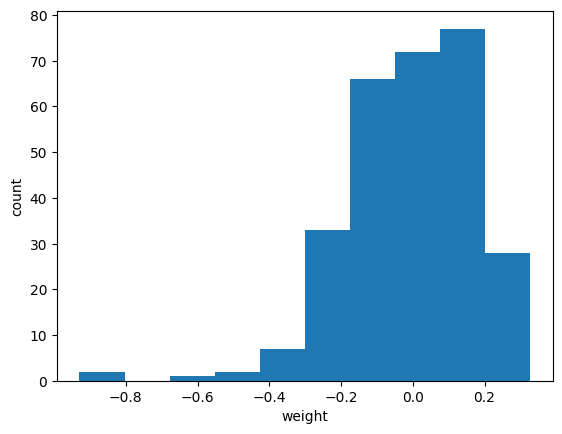

In [19]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

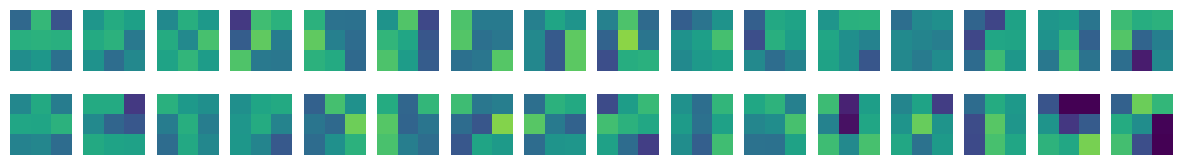

In [20]:
fig,axs=plt.subplots(2,16,figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(conv_weights[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
        axs[i,j].axis('off')
plt.show()

In [24]:
no_training_model=keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))

In [25]:
no_training_conv=no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [27]:
no_training_weights=no_training_conv.weights[0].numpy()
print(no_training_weights.mean(),no_training_weights.std())

0.0016166626 0.08257852


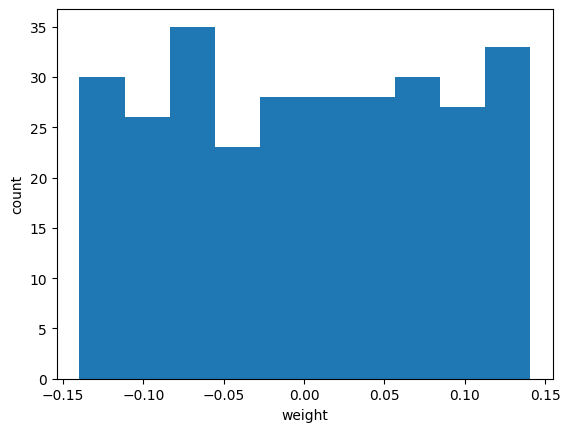

In [28]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

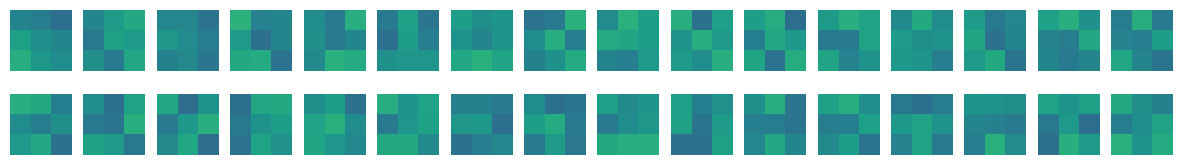

In [29]:
fig,axs=plt.subplots(2,16,figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(no_training_weights[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
        axs[i,j].axis('off')
plt.show()

### Functional API

In [30]:
conv_acti=keras.Model(model.input,model.layers[0].output)

### 특성 맵 시각화

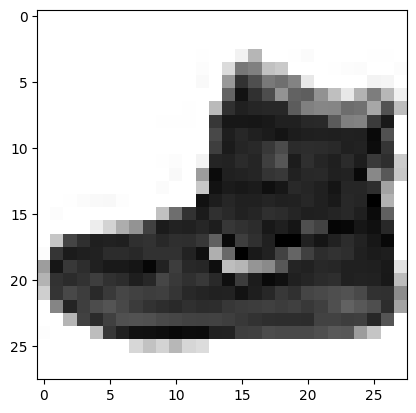

In [31]:
(train_input,train_target),(test_input,test_target)=keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0],cmap='gray_r')
plt.show()

In [32]:
inputs=train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps=conv_acti.predict(inputs)

1/1 [==============================] - 0s 104ms/step


In [33]:
print(feature_maps.shape)

(1, 28, 28, 32)


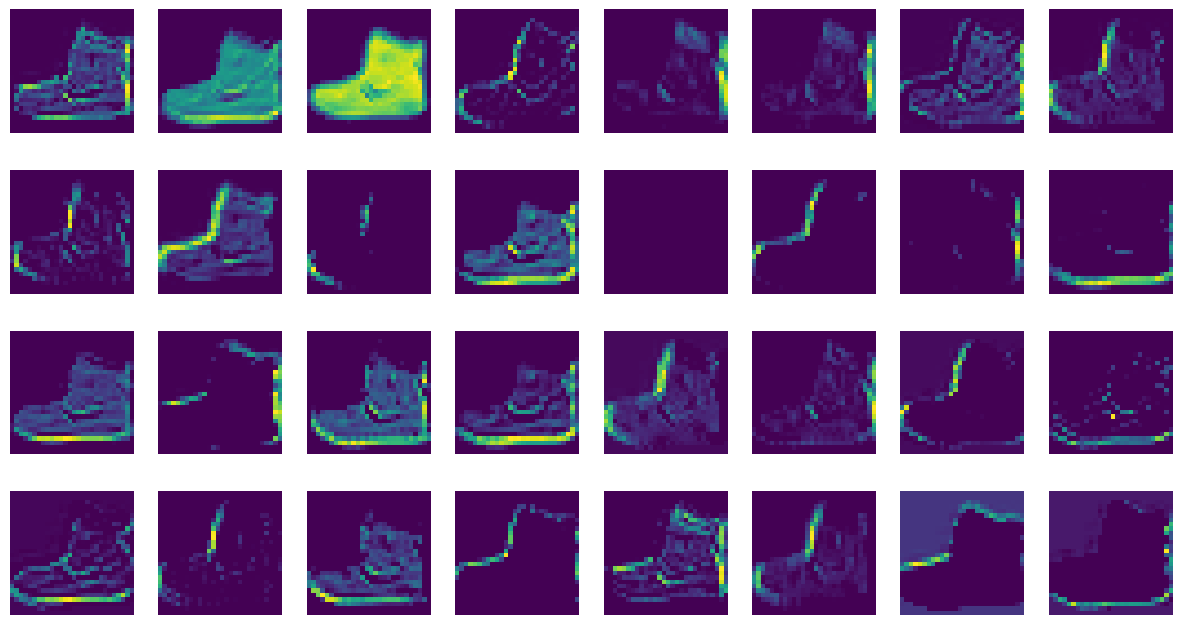

In [34]:
fig,axs=plt.subplots(4,8,figsize=(15,8))
for i in range(4):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis('off')
plt.show()

In [35]:
conv2_acti=keras.Model(model.input,model.layers[2].output)

In [36]:
inputs=train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps=conv2_acti.predict(inputs)

1/1 [==============================] - 0s 133ms/step


In [37]:
print(feature_maps.shape)

(1, 14, 14, 64)


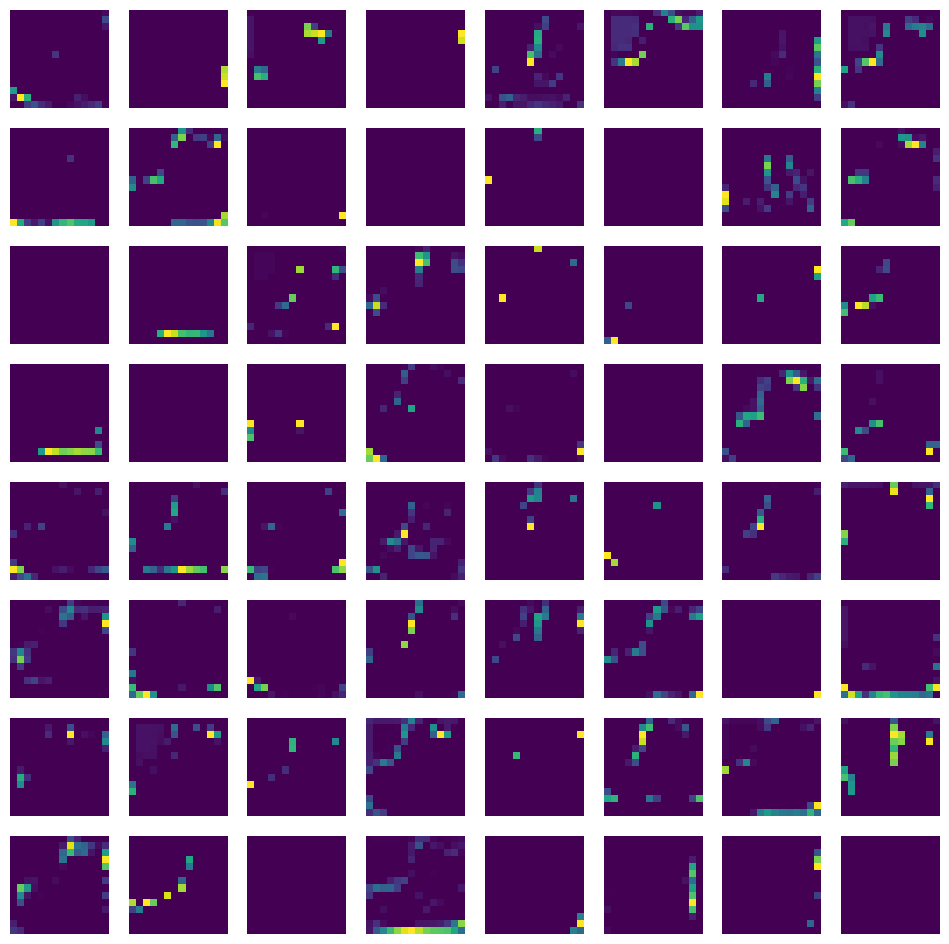

In [38]:
fig,axs=plt.subplots(8,8,figsize=(12,12))
for i in range(8):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis('off')
plt.show()

### 마무리
- `가중치 시각화` : 합성곱 층의 가중치를 이미지로 출력하는 것. 합성곱 신경망은 주로 이미지를 다루기 때문에 가중치가 시각적인 패턴을 학습하는지 알아볼 수 있음
- `특성 맴 시각화` : 합성곱 층의 활성화 출력을 이미지로 그리는 것을 말함. 가중치 시각화와 함께 비교하여 각 필터가 이미지의 어느 부분을 활성화시키는지 확인할 수 있음
- `함수형 API` : 케라스에서 신경망 모델을 만드는 방법 중 하나. Model 클래스에 모델의 입력과 출력을 지정. 전형적으로 입력은 Input() 함수를 사용하여 정의하고 출력은 마지막 층의 출력으로 정의